In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
df_places = gpd.read_file('./Lisboa.geojson')

c:\users\gendouki\pycharmprojects\dinis\venv\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


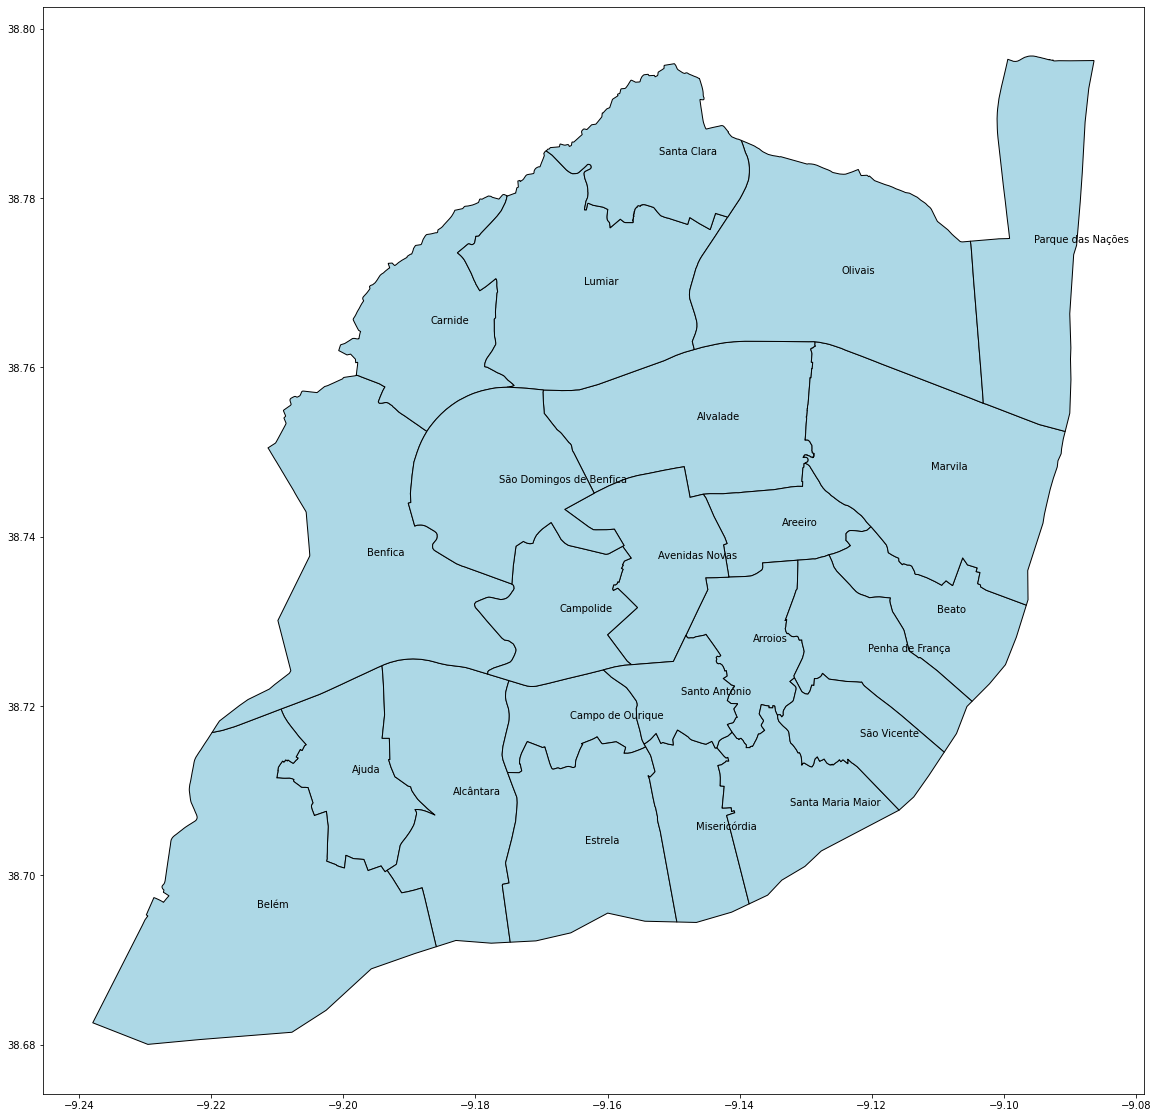

In [2]:
from shapely import geometry

axis = df_places.plot(color="lightblue",edgecolor = "black",
                      figsize = (40,20), 
                      column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE")

for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  

#df_places.plot(ax=ax, color='green')


# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
#axis.set_aspect('equal')

#df_places.plot(ax=axis, color='white', edgecolor='black')

#.plot(ax=ax, marker='o', color='red', markersize=5)

#plt.show()

ambiente:
       .\archives\ambiente\Amb_EcopontosSubterraneos.geojson
       .\archives\ambiente\Amb_Limpeza.geojson
       .\archives\ambiente\Ecopontos.geojson
       .\archives\ambiente\Jardins-Parques-urbanos.geojson
       .\archives\ambiente\Reciclagem.geojson
culturalazer:
       .\archives\culturalazer\Desporto_Instalacoes.geojson
       .\archives\culturalazer\Museus, bibliotecas e arquivos.geojson
economia:
       .\archives\economia\Centros Comerciais.geojson
       .\archives\economia\Feiras.geojson
       .\archives\economia\Mercados.geojson
educacao:
       .\archives\educacao\Escola Secundaria.geojson
       .\archives\educacao\escolas 1 ciclo.geojson
       .\archives\educacao\Escolas 1_Ciclo.geojson
saude:
       .\archives\saude\Farmacias.geojson
       .\archives\saude\Hospitais Publicos.geojson
seguranca:
       .\archives\seguranca\Administracao_Publica.geojson
transportes:
       .\archives\transportes\Estacoes Comboio.geojson
       .\archives\transportes\Estaco

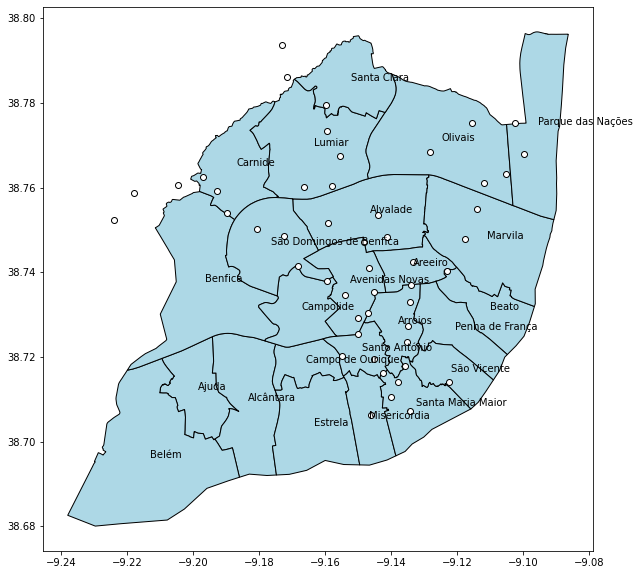

In [3]:
import os

                         
directory = "./archives"
ext = ".geojson"
lista=[]
listadirs=[]
dic={}



def leitura(filtro):
    i=0
    global lista, listadirs, dic
    listafiles=[]
    for root, dirs, files in os.walk(directory):
        
        if len(dirs) > 0:
            listadirs = dirs

        if len(files) > 0:
            for value in files:
                listafiles.append(root.replace("/", "\\")+"\\"+value.replace("/","\\"))

            dic[listadirs[i]] = listafiles
            listafiles = []
            i+=1    
        
        for file in files:
            if file.endswith(ext):
                if filtro is not None:
                    if filtro.find(file.replace(".geojson","")) != -1:
                        ficheiro = os.path.join(root, file)
                        lista.append(gpd.read_file(ficheiro))

def pprint():
    for k,v in dic.items():
        print(k+":")
        for value in v:
            print("       "+ value)


    

leitura(None)
pprint()

a = input("Quais os filtros que deseja:")
leitura(a)


    
fig, ax = plt.subplots(1,1)

ax.set_aspect('equal')
axis = df_places.plot(ax=ax, color="lightblue",edgecolor = "black")
for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  
for a in lista:
    a.plot(ax=ax, color='white', edgecolor='black', legend=True)
        
    

plt.show()

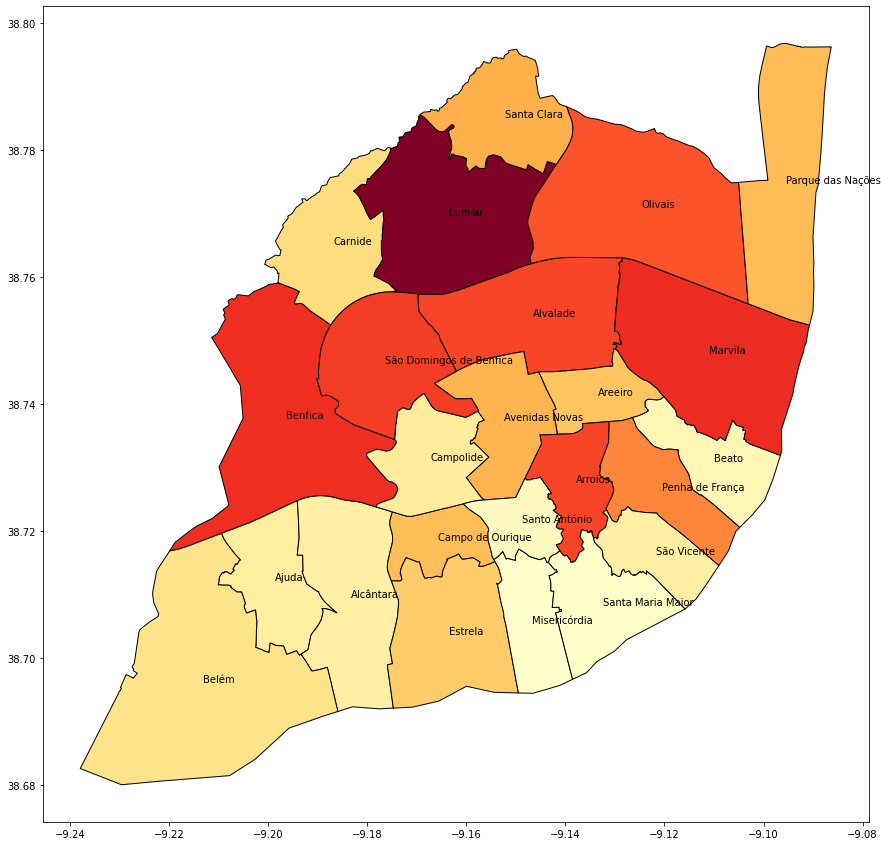

In [4]:
from shapely import geometry
from mpl_toolkits.axes_grid1 import make_axes_locatable



listapop = []
fig, ax = plt.subplots(1, 1, figsize = (30,15))

df_places.explore(column='Censos 2021 População Lisboa_POPULACAO RESIDENTE',cmap='Set2')

for idx, row in df_places.iterrows():
    listapop.append(row['Censos 2021 População Lisboa_POPULACAO RESIDENTE'])
    
for a in range(0, len(listapop)):
    listapop[a] = int(listapop[a])
    
df_places["Censos 2021 População Lisboa_POPULACAO RESIDENTE"] = listapop
    

#df_places = df_places[(df_places["Censos 2021 População Lisboa_POPULACAO RESIDENTE"]!=9660) & (df_places.NOME!=None)]

"""axis = df_places.plot( 
                      column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      edgecolor = "black", 
                      legend = True, 
                      cmap='YlGnBu_r',
                      legend_kwds={'label': "Population",
                        'orientation': "vertical"},
                      ax=ax,
                      tooltip=['nome','Censos 2021 População Lisboa_POPULACAO RESIDENTE'])"""

axis = df_places.plot( 
                      column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      edgecolor = "black", 
                      legend = False, 
                      cmap='YlOrRd',
                      legend_kwds={'label': "Population",
                        'orientation': "vertical"},
                      ax=ax
                      )


for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  



In [15]:
df_places.explore(column='Censos 2021 População Lisboa_POPULACAO RESIDENTE',cmap='OrRd')



'\n\n<style>\n\n</style>\n\n<div id="fig_el3250019869617780966703505665"></div>\n<script>\nfunction mpld3_load_lib(url, callback){\n  var s = document.createElement(\'script\');\n  s.src = url;\n  s.async = true;\n  s.onreadystatechange = s.onload = callback;\n  s.onerror = function(){console.warn("failed to load library " + url);};\n  document.getElementsByTagName("head")[0].appendChild(s);\n}\n\nif(typeof(mpld3) !== "undefined" && mpld3._mpld3IsLoaded){\n   // already loaded: just create the figure\n   !function(mpld3){\n       \n       mpld3.draw_figure("fig_el3250019869617780966703505665", {"width": 1440.0, "height": 720.0, "axes": [{"bbox": [0.32127499271337373, 0.125, 0.3824500145732526, 0.755], "xlim": [-9.245523457130206, -9.078752266409644], "ylim": [38.67419629873052, 38.802596043471375], "xdomain": [-9.245523457130206, -9.078752266409644], "ydomain": [38.67419629873052, 38.802596043471375], "xscale": "linear", "yscale": "linear", "axes": [{"position": "bottom", "nticks": 11,

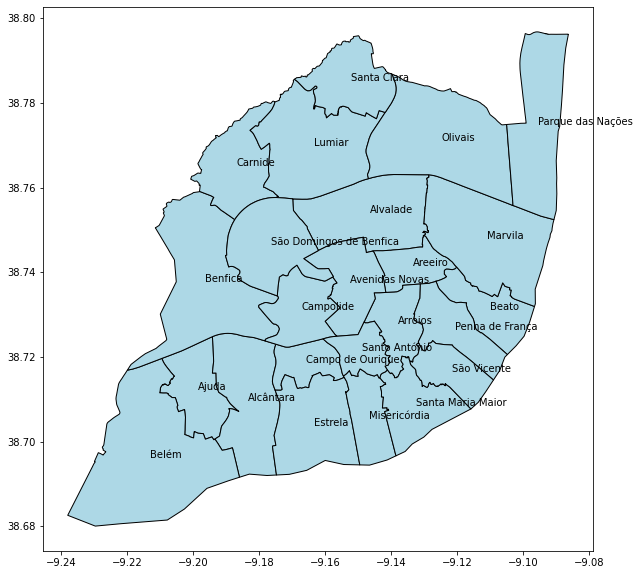

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely import geometry
import matplotlib.pyplot as plt, mpld3
from mpld3 import fig_to_html, plugins

plt.rcParams['figure.figsize'] = (20, 10)
df_places = gpd.read_file('./Lisboa.geojson')

fig, ax = plt.subplots(1,1)

axis = df_places.plot(color="lightblue",edgecolor = "black",figsize = (40,20), ax=ax)

for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  

mpld3.fig_to_html(fig, d3_url=None, 
                  mpld3_url="/whatever", 
                  no_extras=False, 
                  template_type='general', 
                  figid=None, 
                  use_http=True, 
                  include_libraries=True)

AttributeError: 'AxesSubplot' object has no attribute 'get_dict'

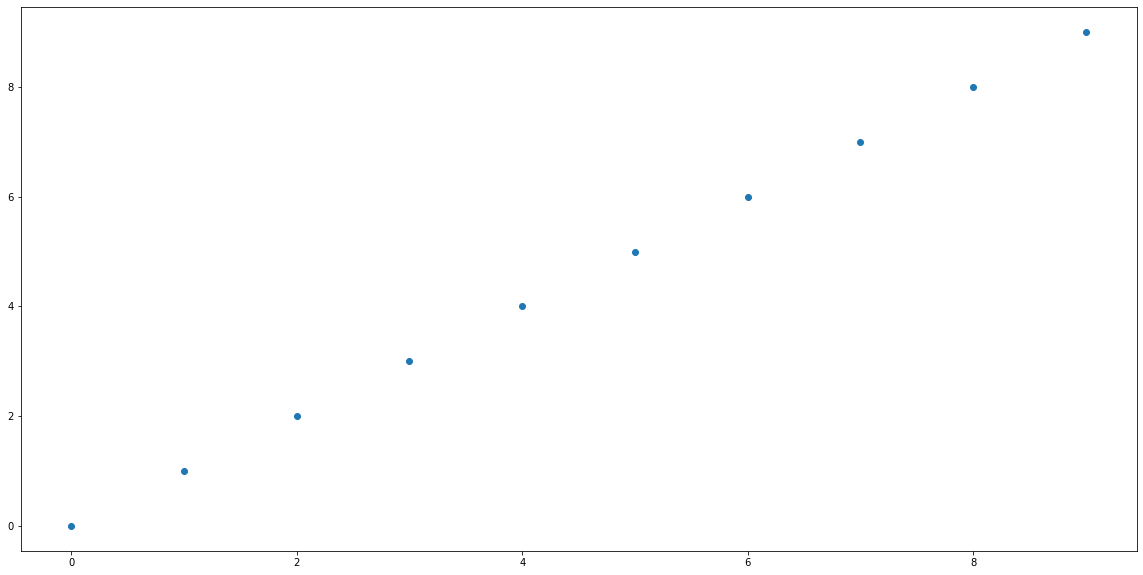

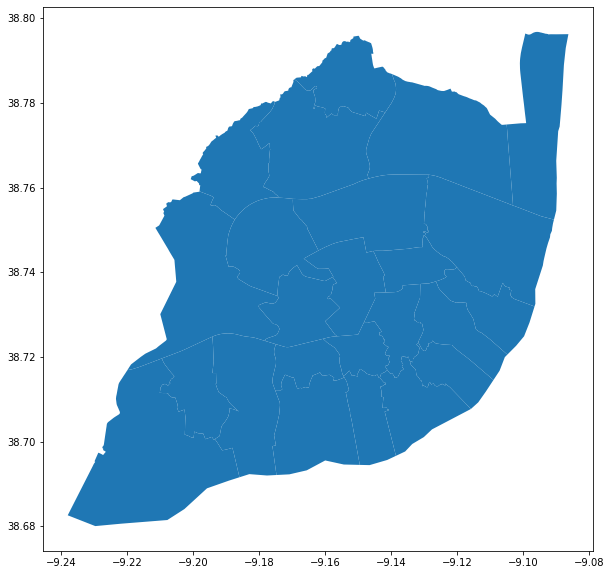

In [130]:
import matplotlib.pyplot as plt
from mpld3 import fig_to_html, plugins
fig, ax = plt.subplots()
lines = ax.plot(range(10), 'o')
plugins.connect(fig, df_places.plot())
fig_to_html(fig)

<AxesSubplot:>

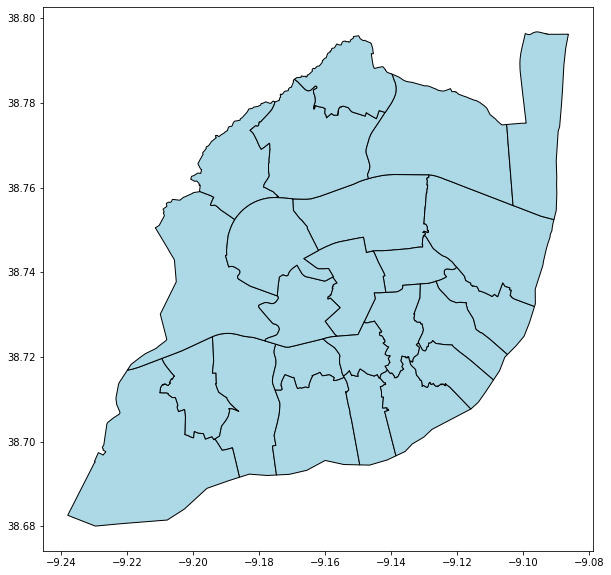

In [146]:

df_places["geometry"].plot(color="lightblue",edgecolor = "black")